[Reference](https://levelup.gitconnected.com/maximizing-pandas-efficiency-top-10-mistakes-to-steer-clear-of-in-your-code-8623aff053cd)

# 1. Having Column Names with Spaces

# 2. Not Using Query Method for Filtering
```python
df.groupby('Sales Amount')['Quantity'].sum()
```

# 2. Not Using Query Method for Filtering

In [1]:
import pandas as pd

df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David'],
                   'age': [25, 30, 35, 40]})

# Subset where age is greater than 30
subset = df.query('age > 30')

In [2]:
# Subset where age is between 30 and 40, inclusive
subset = df.query('age >= 30 and age <= 40')

# 3. Not using @ Symbol when Writing Complex Queries
```python
import pandas as pd

df = pd.read_csv('sales_data.csv')

product_category = 'Electronics'
start_date = '2022-01-01'
end_date = '2022-03-01'
min_sales_amount = 1000
min_quantity = 10

subset = df.query('product_category == @product_category and @start_date <= order_date <= @end_date and (sales_amount >= @min_sales_amount or quantity >= @min_quantity)')
```

# 4. Iterating over Dataframe instead of using Vectorization

In [3]:
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})

for index, row in df.iterrows():
    df.loc[index, 'z'] = row['x'] * row['y']

In [4]:
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})

df['z'] = df['x'] * df['y']

# 5. Treating Slices of Dataframe as New Dataframe

In [5]:
import pandas as pd

# Create a sample DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
        'age': [25, 32, 18, 47, 29],
        'gender': ['F', 'M', 'M', 'M', 'F']}
df = pd.DataFrame(data)

# Create a copy of the DataFrame
new_df = df.loc[df['age'] > 30, ['name', 'age']].copy()

# Modify the new DataFrame
new_df['age'] = new_df['age'] + 5

# Print both DataFrames
print(df)
print(new_df)

      name  age gender
0    Alice   25      F
1      Bob   32      M
2  Charlie   18      M
3    David   47      M
4    Emily   29      F
    name  age
1    Bob   37
3  David   52


# 6. Not Using Chain Commands for Multiple Transformations

In [6]:
import pandas as pd

# Create a sample DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
        'age': [25, 32, 18, 47, 29],
        'gender': ['F', 'M', 'M', 'M', 'F']}
df = pd.DataFrame(data)

# Apply multiple transformations in a single statement
new_df = (df
          .loc[df['age'] > 30, ['name', 'age']]
          .copy()
          .assign(age_plus_5=lambda x: x['age'] + 5))

# Print the new DataFrame
print(new_df)

    name  age  age_plus_5
1    Bob   32          37
3  David   47          52


# 7. Not Setting Column dtypes Correctly

Setting column dtypes in Pandas is an important step in data analysis and manipulation. Dtypes, or data types, are the way Pandas store and represent data in memory. By specifying the dtypes for each column, you can control the memory usage of your data and improve the performance of your Pandas operations.



# 8. Not Using Pandas Plotting Builtin Function

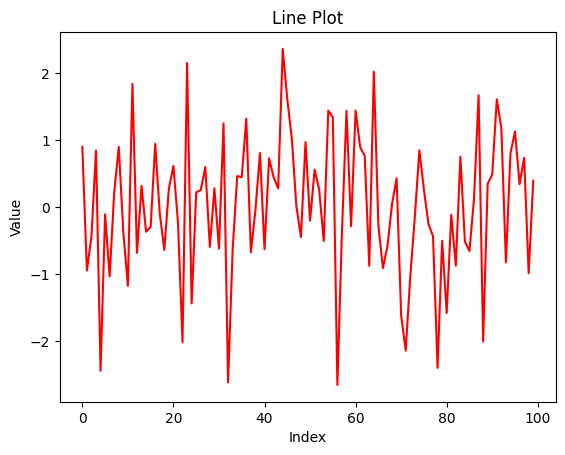

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with some random data
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))

# Plot a line chart of column A
df['A'].plot(kind='line', color='red', title='Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

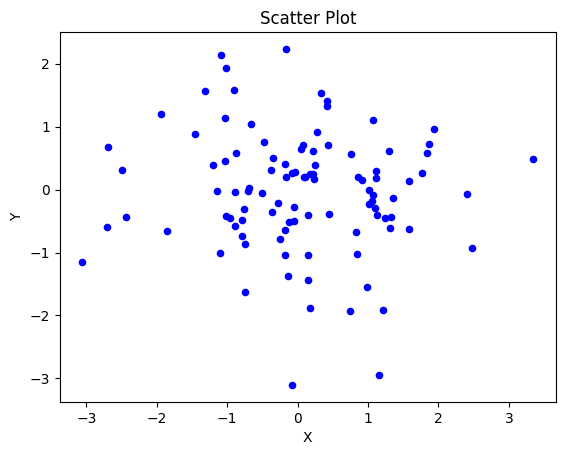

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with some random data
df = pd.DataFrame(np.random.randn(100, 2), columns=['X', 'Y'])

# Plot a scatter chart of columns X and Y
df.plot(kind='scatter', x='X', y='Y', color='blue', title='Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

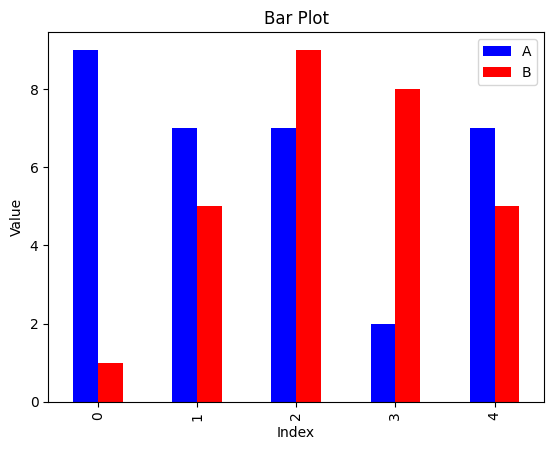

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with some random data
df = pd.DataFrame({'A': np.random.randint(1, 10, 5), 'B': np.random.randint(1, 10, 5)})

# Plot a bar chart of columns A and B
df.plot(kind='bar', color=['blue', 'red'], title='Bar Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

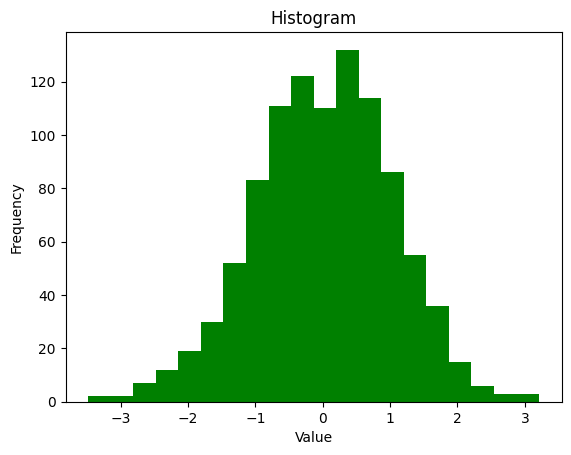

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with some random data
df = pd.DataFrame(np.random.randn(1000, 1), columns=['A'])

# Plot a histogram of column A
df['A'].plot(kind='hist', bins=20, color='green', title='Histogram')
plt.xlabel('Value')
plt.show()

# 9. Aggregation Manually instead of using .groupby()

In [12]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

unique_regions = df['region'].unique()

for region in unique_regions:
    region_sales = df[df['region'] == region]['sales']
    total_sales = region_sales.sum()
    average_sales = region_sales.mean()
    max_sales = region_sales.max()
    min_sales = region_sales.min()
    print(f'{region}: Total Sales: {total_sales}, Average Sales: {average_sales}, Max Sales: {max_sales}, Min Sales: {min_sales}')

In [13]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

region_stats = df.groupby('region')['sales'].agg(['sum', 'mean', 'max', 'min'])
print(region_stats)

In [14]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

region_sales = pd.pivot_table(df, index='region', values='sales', aggfunc=['sum', 'mean', 'max', 'min'])
category_sales = pd.pivot_table(df, index='category', values='sales', aggfunc=['sum', 'mean', 'max', 'min'])
product_sales = pd.pivot_table(df, index='product', values='sales', aggfunc=['sum', 'mean', 'max', 'min'])

print(region_sales)
print(category_sales)
print(product_sales)

In [15]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

sales_stats = df.groupby(['region', 'category', 'product'])['sales'].agg(['sum', 'mean', 'max', 'min'])
print(sales_stats)

# 10. Saving Large Datasets as CSV File
- Parquet
- Feather
- HDF5
- Apache Arrocw